In [780]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

## Initial trial

In [781]:
print( [i for i in range(10)] )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [782]:
noise = np.random.random_sample((100))
sin = [ np.sin(x) for x in range(100) ]
cos = [ np.cos(x) for x in range(100) ]

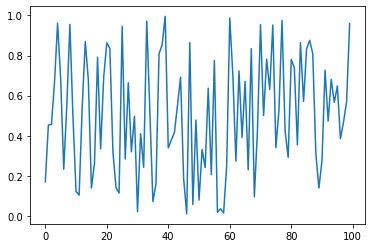

In [783]:
plt.plot(noise)

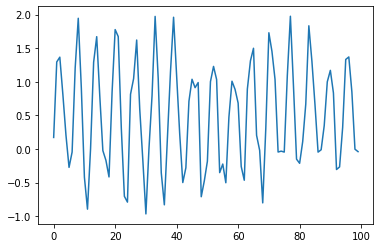

In [784]:
plt.plot(noise + sin)

C:\Users\bvptr\anaconda3\envs\pulsar\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


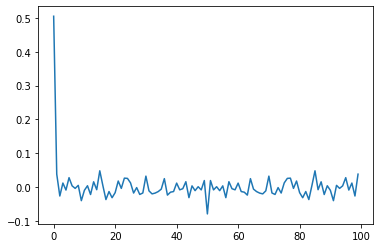

In [785]:
plt.plot(np.fft.fft(noise)/len(noise))

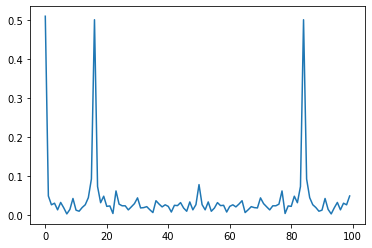

In [786]:
plt.plot(np.abs(np.fft.fft(noise + sin )/len(noise + sin)))

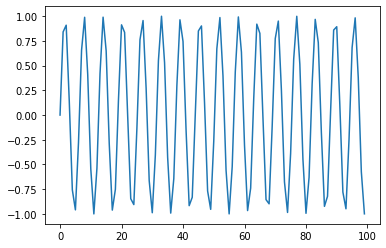

In [787]:
plt.plot(sin)

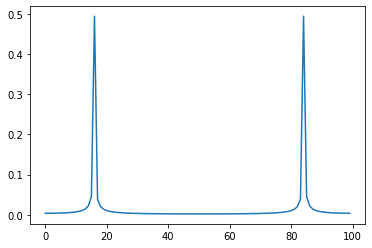

In [788]:
plt.plot(np.abs(np.fft.fft(sin)/len(sin)))

C:\Users\bvptr\anaconda3\envs\pulsar\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


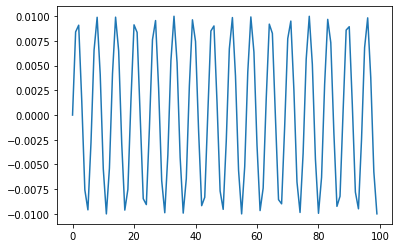

In [789]:

plt.plot(np.fft.ifft(np.fft.fft(sin)/len(sin)))

This is a different package. appears to work the same.

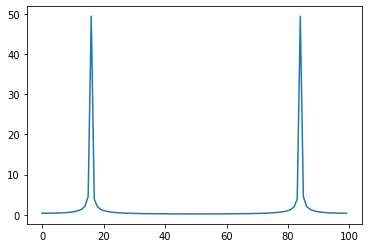

In [790]:
plt.plot(np.abs(scipy.fftpack.fft(sin)))

## Trial 2

In [791]:
noise = np.random.random_sample((100))

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
xvals = np.linspace(0.0, N*T, N)
sin = np.sin(50.0 * 2.0*np.pi*xvals)# + 0.5*np.sin(80.0 * 2.0*np.pi*x)
sin = sin
#cos = [ np.cos(x) for x in range(100) ]

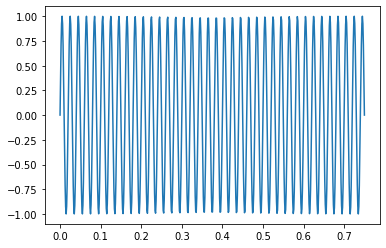

In [792]:
plt.plot(xvals, sin)

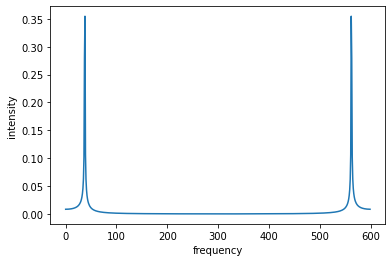

In [793]:
#plt.plot(np.fft.fft(sin)/len(sin))
plt.ylabel('intensity')
plt.xlabel('frequency')
plt.plot(abs(np.fft.fft(sin)/len(sin)))

## Trial 3

In [794]:
N = 100
interval = 1 /N

In [795]:
time = np.arange(0, 5, interval)

In [796]:
signal1Frequency = 4
signal2Frequency = 7

sin1 = np.sin(2*np.pi*signal1Frequency*time)
sin2 = np.sin(2*np.pi*signal2Frequency*time)

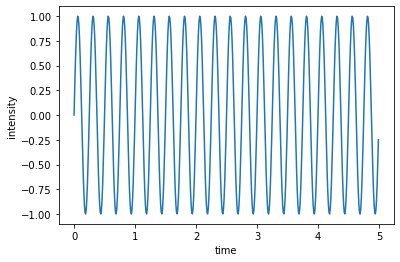

In [797]:
plt.ylabel('intensity')
plt.xlabel('time')
plt.plot(time, sin1)

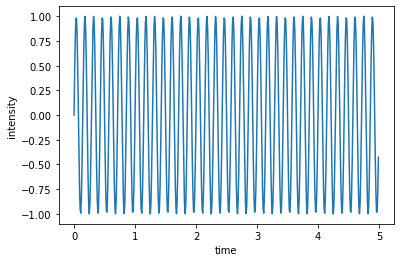

In [798]:
plt.ylabel('intensity')
plt.xlabel('time')
plt.plot(time, sin2)

In [799]:
transform1 = np.fft.fft(sin1)/len(sin1)
transform1 = transform1[range(int(len(sin1)/2))] # Exclude sampling frequency

In [800]:
time_count = len(time)
values = np.arange(int(time_count/2))
time_period = time_count / N
frequencies = values / time_period

In [801]:
print( len(transform1) )
print( len(frequencies) )

250
250


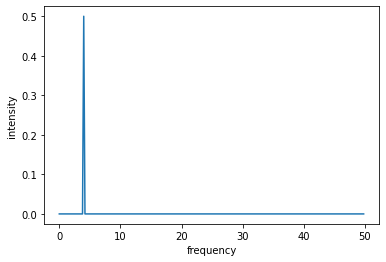

In [802]:
plt.ylabel('intensity')
plt.xlabel('frequency')
plt.plot(frequencies, abs(transform1))

## Trial 4
Noise with sin in it and with time. 

In [803]:
N = 100
interval = 1 / N
begin = 0
end = 5
time = np.arange(begin, end, interval)

In [804]:
noise = np.random.random_sample(N * (end - begin))

In [805]:
print(len(time))
print(len(noise))

500
500


sines

In [806]:
signal1Frequency = 10
signal2Frequency = 7
sin1 = np.sin(2*np.pi*signal1Frequency*time)
sin2 = np.sin(2*np.pi*signal2Frequency*time)

In [807]:
#signal = noise + sin1 + sin2
#signal = noise

Add many sines

In [808]:
signal = noise
for i in range(1, 5):
    signal += np.sin(2*np.pi * 10 * i *time)

do things to compute the frequency

In [809]:
time_count = len(time)
values = np.arange(int(time_count/2))
time_period = time_count / N
frequencies = values / time_period

In [810]:
transform = np.fft.fft(signal)/len(signal)
transform = transform[range(int(len(signal)/2))] # Exclude sampling frequency

In [811]:
print(len(time))
print(len(frequencies))
print(len(transform))

500
250
250


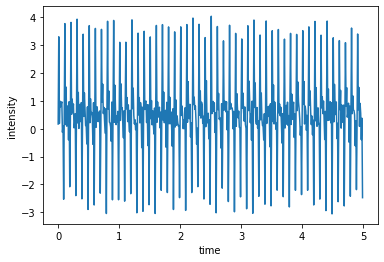

In [812]:
plt.ylabel('intensity')
plt.xlabel('time')
plt.plot(time, signal)

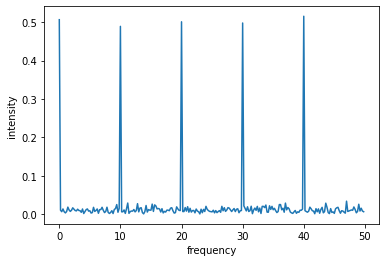

In [813]:
plt.ylabel('intensity')
plt.xlabel('frequency')
plt.plot(frequencies, np.abs(transform))

we should now be able to retrieve the set frequency by getting the peak of the fourier spectrum

In [814]:
# NOTE: Currently broken
def greatest_frequency_from_transform(frequencies, transform):
    index = list(transform).index(max(transform))
    return  frequencies[index]

In [815]:
freq = greatest_frequency_from_transform(frequencies[10:],transform)
print(freq)

2.0
